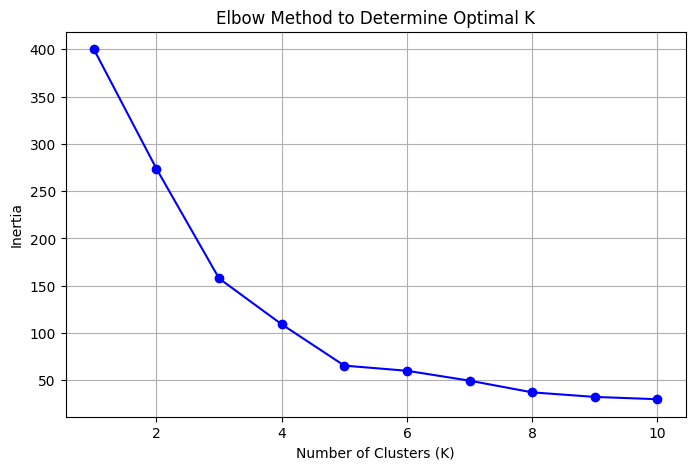

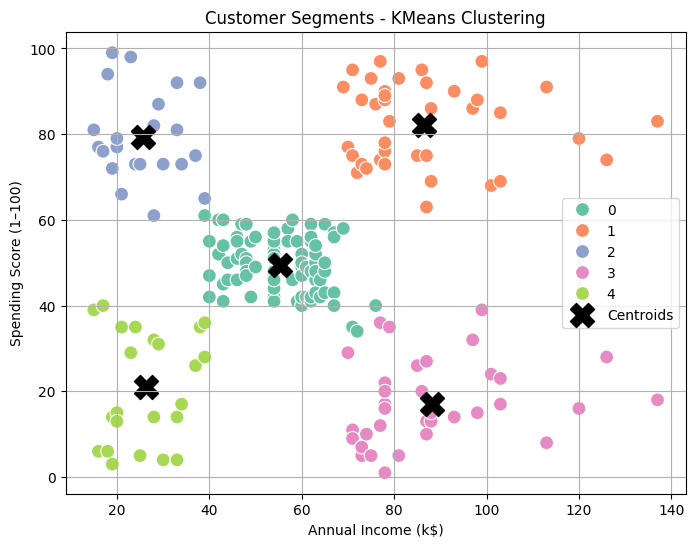

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("Mall_Customers.csv")
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.rename(columns={
    'Annual Income (k$)': 'Income',
    'Spending Score (1-100)': 'Score'
}, inplace=True)
features = df[['Income', 'Score']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal K')
plt.grid(True)
plt.show()
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_features)
df['Cluster'] = clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Income', y='Score',
    hue='Cluster',
    palette='Set2',
    data=df,
    s=100
)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    s=300,
    c='black',
    label='Centroids',
    marker='X'
)
plt.title('Customer Segments - KMeans Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.legend()
plt.grid(True)
plt.show()